In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files- (Folder inside of Colab- CNN folder- Images- Train/Test folder- Inside of each there are bunny/dog folders) 
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Faces")
os.getcwd() 

'/content/gdrive/My Drive/Colab Notebooks/Faces'

In [3]:
# Import libraries
from __future__ import print_function, division

import os
import numpy as np
import random
import os
import glob
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

from scipy.misc import imresize, imsave

from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense, BatchNormalization
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# Function to rename multiple files 
path1 = "/content/gdrive/My Drive/Colab Notebooks/Faces/Happy/"
path0 = "/content/gdrive/My Drive/Colab Notebooks/Faces/Sad/"
'''
i = 0
      
for filename in os.listdir(path1): 
        dst ="Happy"+str(i) + ".jpg"
        src = path1 + filename 
        dst = path1+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
   '''     
i = 0
      
for filename in os.listdir(path0): 
        dst ="Sad"+str(i) + ".jpg"
        src = path0 + filename 
        dst = path0+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1

In [0]:
os.listdir(path)

In [0]:
#Giving labels to the images: 1 for happy, 0 for sad


path = "/content/gdrive/My Drive/Colab Notebooks/Faces"

files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if 'Happy' in category:
        categories.append(1)
    elif 'Sad' in category:
        categories.append(0)
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

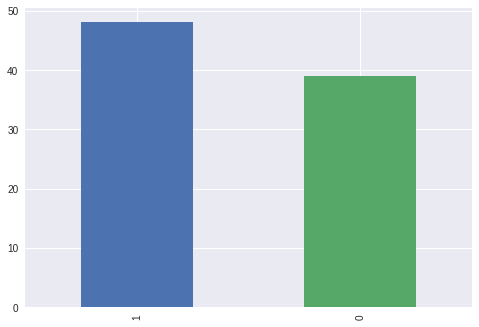

In [7]:
#Bar chart for the categories
df['category'].value_counts().plot.bar()

In [0]:
df=shuffle(df)

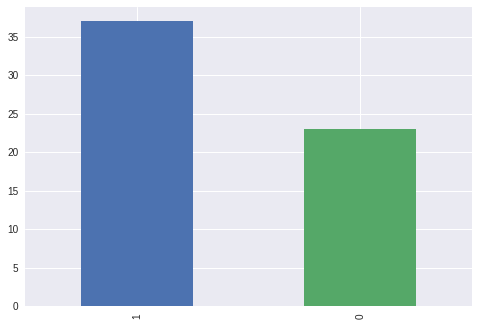

In [48]:
#Prepare Test and Train Data
train_df, validate_df = train_test_split(df, test_size=0.30)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

total_train = train_df.shape[0] #the number of images in the training df
total_validate = validate_df.shape[0]  #the number of images in the validate df
batch_size=5

In [49]:
#FAST_RUN = False
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
__________

In [50]:
#Traning Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/gdrive/My Drive/Colab Notebooks/Faces", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 60 images belonging to 2 classes.


In [51]:
#Validation Generator

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/My Drive/Colab Notebooks/Faces", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 27 images belonging to 2 classes.


Found 1 images belonging to 1 classes.


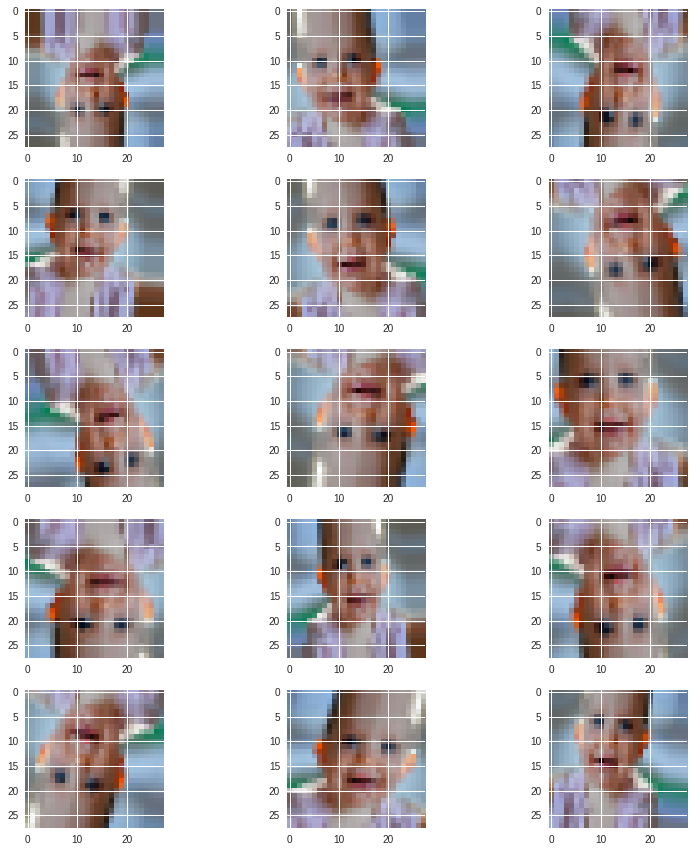

In [52]:
#See how our generator work

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/gdrive/My Drive/Colab Notebooks/Faces", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

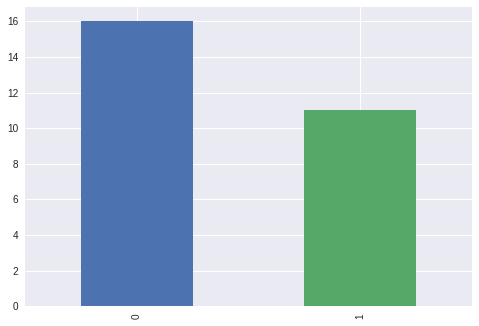

In [53]:
validate_df['category'].value_counts().plot.bar()

In [0]:
#Early Stop
earlystop = EarlyStopping(patience=200)

#Learning Rate Reduction
#We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [0]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [56]:
#Fit Model
#epochs=3 if FAST_RUN else 25
history = model.fit_generator(
    train_generator, 
    epochs=100,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks_list
)

Epoch 1/100
12/12 [==============================] - 2s 131ms/step - loss: 2.0454 - acc: 0.5000 - val_loss: 1.2986 - val_acc: 0.4000

Epoch 00001: val_acc improved from -inf to 0.40000, saving model to weights-improvement-01-0.40.hdf5
Epoch 2/100
12/12 [==============================] - 0s 41ms/step - loss: 0.9984 - acc: 0.6500 - val_loss: 1.8409 - val_acc: 0.6364

Epoch 00002: val_acc improved from 0.40000 to 0.63636, saving model to weights-improvement-02-0.64.hdf5
Epoch 3/100
12/12 [==============================] - 0s 40ms/step - loss: 1.1722 - acc: 0.6167 - val_loss: 2.6809 - val_acc: 0.4545

Epoch 00003: val_acc did not improve from 0.63636
Epoch 4/100
12/12 [==============================] - 0s 38ms/step - loss: 0.7277 - acc: 0.7167 - val_loss: 1.5454 - val_acc: 0.7273

Epoch 00004: val_acc improved from 0.63636 to 0.72727, saving model to weights-improvement-04-0.73.hdf5
Epoch 5/100
12/12 [==============================] - 0s 40ms/step - loss: 1.0008 - acc: 0.5667 - val_loss: 1

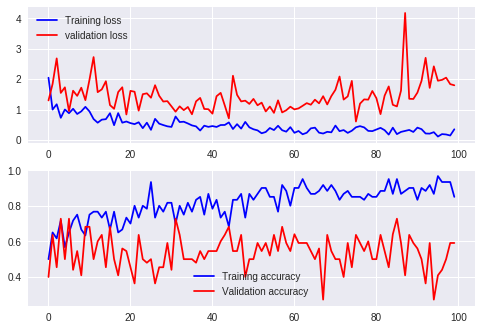

In [57]:

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

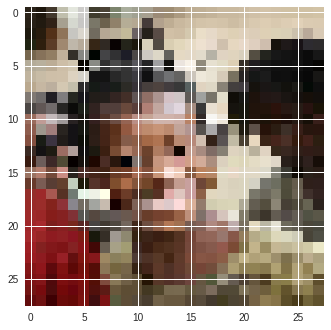

In [74]:
test_image = load_img('/content/gdrive/My Drive/Colab Notebooks/Faces/Happy1.jpg', target_size = (28, 28))
plt.imshow(test_image)
plt.show()

In [75]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'Happy'
else:
    prediction = 'Sad'

print (prediction)

Happy
